## Super resolution Inference

Code inspired by: https://github.com/kheyer/Enhance-app

In [26]:
from fastai.vision import *

In [27]:
name_img = 'test_img.jpg'

In [28]:
url_img = 'https://www.what-dog.net/Images/faces2/scroll0015.jpg'
#url_img = 'https://cdn.pixabay.com/photo/2016/02/19/15/46/dog-1210559__340.jpg'
download_url(url_img,name_img, overwrite=True)
img = open_image(name_img)
print(f'img.shape = {img.shape}')

img.shape = torch.Size([3, 600, 600])


In [39]:
def round_up_to_even(f): 
    return math.ceil(f / 2.) * 2

rounded_up_size = np.array([round_up_to_even(img.shape[1]),round_up_to_even(img.shape[2])])
new_size = 2*rounded_up_size
new_size

array([1200, 1200])

In [40]:
path_test = Path('.')
data_test = (ImageImageList.from_folder(path_test).no_split()
          .label_from_func(lambda x: path_test/x.name)
          .transform(get_transforms(do_flip=False), size=new_size, tfm_y=True)
          .databunch(bs=1).normalize(imagenet_stats, do_y=True))
data_test.c = 3

In [41]:
learn = unet_learner(data_test, models.resnet34, loss_func=F.l1_loss, blur=True, norm_type=NormType.Weight)

In [42]:
learn.load('superres-fastai-lesson7');

In [43]:
img_hr = learn.predict(img)[0]
img_hr.save('test_img_hr.jpg')

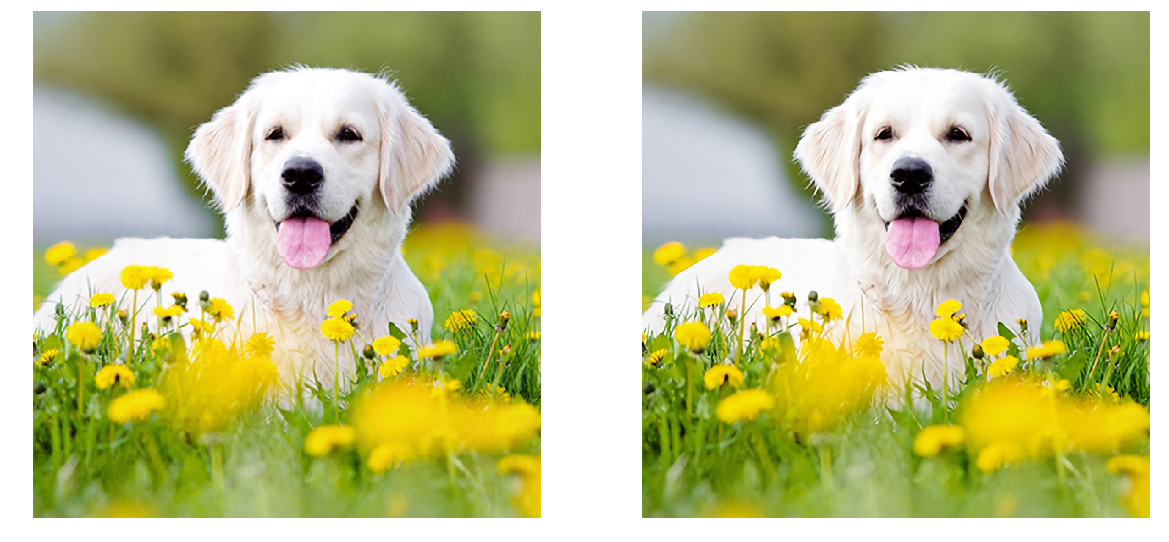

In [53]:
fig, ax = plt.subplots(1,2,figsize=(20,15))
img.show(ax[0])
img_hr.show(ax[1])